<a href="https://colab.research.google.com/github/hasmijalla/neuralnets/blob/main/ML_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries for preprocessing and analysis. 
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as graph

In [ ]:
aapl = pd.read_csv('https://raw.githubusercontent.com/vasanthkandadi/AppleStockPrediction/main/AAPL.csv')
no_null = aapl.dropna()
print(aapl.describe())
date_range = no_null[no_null['Date']>'2014-12-31']  #Extracting the data from Jan-2015 to June-2022 
print(date_range)
unique_dates = date_range.drop_duplicates('Date', keep='last')
closing_list = pd.DataFrame(unique_dates['Close']).reset_index()['Close']

               Open          High           Low         Close     Adj Close  \
count  10468.000000  10468.000000  10468.000000  10468.000000  10468.000000   
mean      14.757987     14.921491     14.594484     14.763533     14.130431   
std       31.914174     32.289158     31.543959     31.929489     31.637275   
min        0.049665      0.049665      0.049107      0.049107      0.038329   
25%        0.283482      0.289286      0.276786      0.283482      0.235462   
50%        0.474107      0.482768      0.465960      0.475446      0.392373   
75%       14.953303     15.057143     14.692589     14.901964     12.835269   
max      182.630005    182.940002    179.119995    182.009995    181.511703   

             Volume  
count  1.046800e+04  
mean   3.308489e+08  
std    3.388418e+08  
min    0.000000e+00  
25%    1.237768e+08  
50%    2.181592e+08  
75%    4.105794e+08  
max    7.421641e+09  
             Date        Open        High         Low       Close   Adj Close  \
8589   20

In [ ]:
closing_ts = pd.Series(closing_list)
print(closing_ts)

0        27.332500
1        26.562500
2        26.565001
3        26.937500
4        27.972500
           ...    
1874    131.880005
1875    132.759995
1876    135.429993
1877    130.059998
1878    131.559998
Name: Close, Length: 1879, dtype: float64


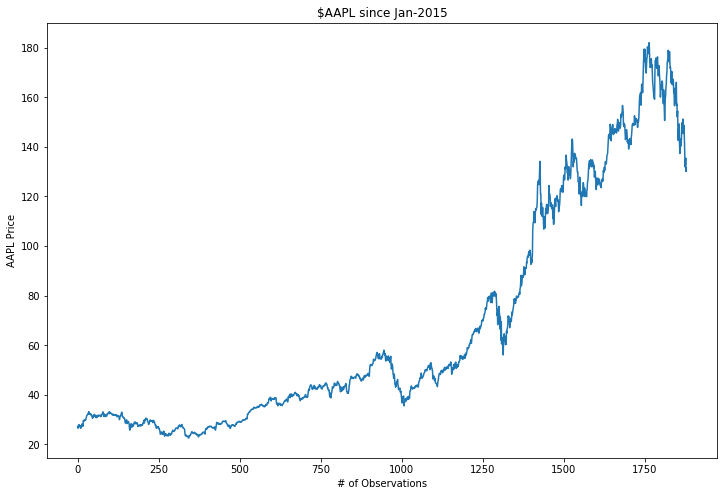

In [ ]:
# Plot of original Apple stocks
graph.figure(figsize=(12, 8))
graph.title('$AAPL since Jan-2015')
graph.plot(closing_ts)
graph.xlabel('# of Observations')
graph.ylabel('AAPL Price')
graph.show()

In [ ]:
#  Helper function to scale the data using min-max normalization
def normalizer(actual_vals):
    range_val = max(actual_vals) - min(actual_vals)
    norm_vals = []
    for val in actual_vals:
        converted = (val-min(actual_vals))/range_val
        norm_vals.append(converted)
    return norm_vals

In [ ]:
normalized_ts = pd.Series(normalizer(closing_ts))
print(normalized_ts)

0       0.029779
1       0.024949
2       0.024965
3       0.027301
4       0.033793
          ...   
1874    0.685558
1875    0.691077
1876    0.707825
1877    0.674141
1878    0.683550
Length: 1879, dtype: float64


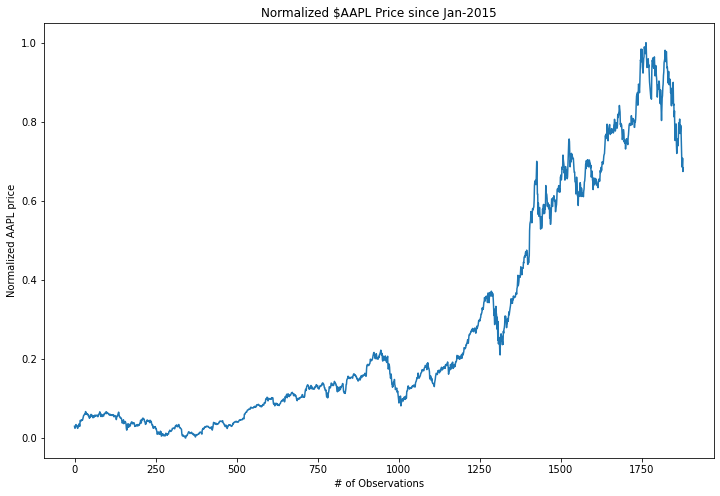

In [ ]:
# Plot of scaled APPL price
graph.figure(figsize=(12, 8))
graph.title('Normalized $AAPL Price since Jan-2015')
graph.plot(normalized_ts)
graph.xlabel('# of Observations')
graph.ylabel('Normalized AAPL price')
graph.show()

In [ ]:
#Splitting the original dataset in the ratio 4:1 ( Training : Testing )
tmp_train_set, test_set = split(normalized_ts, test_size=0.2, shuffle=False)

#Again splitting the obtained training set in the ratio 4:1 ( Training : Validation )
train_set, validation_set = split(tmp_train_set, test_size=0.2, shuffle=False)

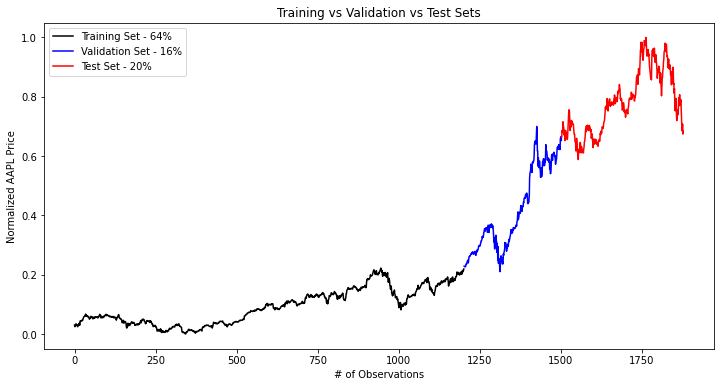

In [ ]:
graph.figure(figsize=(12, 6))
graph.title('Training vs Validation vs Test Sets')
graph.plot(train_set, label = 'Training Set - 64%', color = 'black')
graph.plot(validation_set, label = 'Validation Set - 16%', color = 'blue')
graph.plot(test_set, label = 'Test Set - 20%', color = 'red')
graph.xlabel('# of Observations')
graph.ylabel('Normalized AAPL Price')
graph.legend()
graph.show()

In [ ]:
class LSTM:
    
    # Initializing states,weights and bias for the LSTM gates
    def __init__(self, dim_x, dim_y, hdn_units, num__lstmcells, alpha_rt):
    
        # Input Dimension X
        self.dim_x = dim_x 
        # Output Dimension Y
        self.dim_y = dim_y
        #  num of neuronns in hiddn layr
        self.hdn_units = hdn_units
        # No. of lstm cells
        self.num__lstmcells = num__lstmcells 
        # learning rate
        self.alpha_rt = alpha_rt
        
        # States storage for --> forget, --> input, --> candidate , --> cell , --> output and --> hidden gates

        self.forget_state = [np.zeros((hdn_units,1)) for fill in range(num__lstmcells)]
        
        self.input_state = [np.zeros((hdn_units,1)) for fill in range(num__lstmcells)]
        
        self.cand_state = [np.zeros((hdn_units,1)) for fill in range(num__lstmcells)]
        
        self.cell_state = [np.zeros((hdn_units,1)) for fill in range(num__lstmcells)] 
       
        self.output_state = [np.zeros((hdn_units,1)) for fill in range(num__lstmcells)]
        
        self.hidden_state = [np.zeros((hdn_units,1)) for fill in range(num__lstmcells)] 
        
        # weights corresponding to forget , input , cell state and output gates

        self.forget_weight = nr.random((hdn_units, hdn_units + dim_x ))/np.sqrt(self.hdn_units + dim_x)
         
        self.input_weight = nr.random((hdn_units, hdn_units + dim_x ))/np.sqrt(self.hdn_units + dim_x)
      
        self.cell_weight = nr.random((hdn_units,  hdn_units + dim_x))/np.sqrt(self.hdn_units + dim_x)
        
        self.output_weight = nr.random((hdn_units, hdn_units + dim_x ))/np.sqrt(self.hdn_units + dim_x)

        # bias corresponding to forget , input , cell state and output gates

        self.forget_bias = nr.random((hdn_units, 1))

        self.input_bias = nr.random((hdn_units, 1))

        self.cell_bias = nr.random((hdn_units, 1))

        self.output_bias = nr.random((hdn_units, 1))
        
        # Final Weight
        self.final_weight = nr.random((dim_y, hdn_units))
        # Final Output
        self.final_bias= nr.random((dim_y, 1))
    

    def prop_forward(self, x):

          # Forward propagation

        
        x = np.array(x)
        self.x = x
        for num in range(1, self.num__lstmcells):
            frgt = self.act_func_sig(self.forget_weight @ np.vstack((self.hidden_state[num-1], self.x[num])) + self.forget_bias)
            inpt = self.act_func_sig(self.input_weight @ np.vstack((self.hidden_state[num-1], self.x[num])) + self.input_bias)
            cand = self.act_func_tan(self.cell_weight @ np.vstack((self.hidden_state[num-1], self.x[num])) + self.cell_bias)
            cell = frgt*self.cell_state[num-1] + inpt*cand
            otpt = self.act_func_sig(self.output_weight @ np.vstack((self.hidden_state[num-1], self.x[num])) + self.output_bias)
            hidn = otpt*self.act_func_tan(cell)
            
            # Store the obtained frgt,inpt,cand,cell,otpt,hidn values.
            self.forget_state[num] = frgt
            self.input_state[num] = inpt
            self.cand_state[num] = cand
            self.cell_state[num] = cell     
            self.output_state[num] = otpt
            self.hidden_state[num] = hidn
            
        # Return the predicted closing value
        predicted_close = self.final_bias + self.final_weight @ self.hidden_state[-1] 
        return predicted_close
    
    # Back Propagation
    def prop_backward(self, actual_close, predicted_close):

        # Delta values for --> forget , --->input , --->candidate , --->cell , --->output and  --->hidden gates
        d_forget_state = [np.zeros((self.hdn_units,1)) for n in range(self.num__lstmcells+1)]
        
        d_input_state = [np.zeros((self.hdn_units,1)) for n in range(self.num__lstmcells+1)]
        
        d_cand_state = [np.zeros((self.hdn_units,1)) for n in range(self.num__lstmcells+1)]
        
        d_cell_state = [np.zeros((self.hdn_units,1)) for n in range(self.num__lstmcells+1)]
        
        d_output_state = [np.zeros((self.hdn_units,1)) for n in range(self.num__lstmcells+1)] 
        
        d_hidden_state = [np.zeros((self.hdn_units,1)) for n in range(self.num__lstmcells+1)]
       

        # δ values for output,forget,input,cell gates biases and weights.
        
        d_output_weight = np.zeros_like(a=self.output_weight)
        d_output_bias = np.zeros_like(a=self.output_bias)
        
        d_input_weight = np.zeros_like(a=self.input_weight)
        d_input_bias = np.zeros_like(a=self.input_bias)
        
        d_forget_weight = np.zeros_like(a=self.forget_weight)
        d_forget_bias = np.zeros_like(a=self.forget_bias)

        d_cell_weight = np.zeros_like(a=self.cell_weight)
        d_cell_bias = np.zeros_like(a=self.cell_bias)    
        
        d_final_weight = np.zeros_like(a=self.final_weight)
        d_final_bias = np.zeros_like(a=self.final_bias)  

        # Calculate the result δ values for bias and weight
        delta_err = actual_close - predicted_close
        d_final_weight = delta_err * self.hidden_state[-1].T
        d_final_bias = delta_err 

        for r in reversed(range(self.num__lstmcells)):

            # Delta values for --> hidden state, --->output state, --->cell state, --->forget state, --->input state, --->candidate state
            d_hidden_state[r] = self.final_weight.T @ delta_err + d_hidden_state[r+1]
            
            d_output_state[r] = self.act_func_tan(self.cell_state[r]) * d_hidden_state[r] * self.act_func_dsig(self.hidden_state[r])
            
            d_cell_state[r] = self.output_state[r] * d_hidden_state[r] * self.act_func_dtan(self.cell_state[r]) + d_cell_state[r+1]
            
            d_forget_state[r] = self.cell_state[r-1] * d_cell_state[r] * self.act_func_dsig(self.forget_state[r])
            
            d_input_state[r] = self.cand_state[r] * d_cell_state[r] * self.act_func_dsig(self.input_state[r])
            
            d_cand_state[r] = self.input_state[r] * d_cell_state[r] * self.act_func_dtan(self.cand_state[r])
            
            z = np.vstack((self.hidden_state[r-1], self.x[r]))
            
            # Compute all deltas values
            d_forget_weight = d_forget_weight + d_forget_state[r] @ z.T
            d_forget_bias = d_forget_bias + d_forget_state[r]
            
            d_input_weight = d_input_weight + d_input_state[r] @ z.T
            d_input_bias = d_input_bias + d_input_state[r]
            
            d_output_weight = d_output_weight + d_output_state[r] @ z.T
            d_output_bias = d_output_bias + d_output_state[r]
            
            d_cell_weight = d_cell_weight + d_cell_state[r] @ z.T
            d_cell_bias = d_cell_bias + d_cell_state[r]            

        return d_final_weight, d_final_bias, d_forget_weight/self.num__lstmcells, d_forget_bias/self.num__lstmcells, d_input_weight/self.num__lstmcells, d_input_bias/self.num__lstmcells, d_output_weight/self.num__lstmcells, d_output_bias/self.num__lstmcells, d_cell_weight/self.num__lstmcells, d_cell_bias/self.num__lstmcells

    overall_loss = []

    # Training the LSTM model

    def fit(self, epochs, x, actual_close, x_valset=None, actual_closing_valset=None):
        overall_loss_train = []
        overall_loss_valid = []  # This is where we will store the loss values for training and validation sets 

        for start in range(epochs):
            
            tr_loss = 0           # Initializing loss variables to compute loss for each epoch for both training and validation sets
            val_loss = 0         
            for i in range(len(x)):
            
                # Predicting the closing value
                predicted_close = self.prop_forward(x[i])

                # Propagating backwards using the error found
                d_final_weight, d_final_bias, d_forget_weight, d_forget_bias, d_input_weight, d_input_bias, d_output_weight, d_output_bias, d_cell_weight, d_cell_bias = self.prop_backward(actual_close[i], predicted_close)

                # Computing the updates values of --> weights as well as --> biases 

                self.forget_weight += self.alpha_rt * d_forget_weight
                self.forget_bias += self.alpha_rt * d_forget_bias

                self.input_weight += self.alpha_rt * d_input_weight
                self.input_bias += self.alpha_rt * d_input_bias

                self.cell_weight += self.alpha_rt * d_cell_weight
                self.cell_bias += self.alpha_rt * d_cell_bias

                self.output_weight += self.alpha_rt * d_output_weight
                self.output_bias += self.alpha_rt * d_output_bias                

                self.final_weight += self.alpha_rt * d_final_weight
                self.final_bias += self.alpha_rt * d_final_bias 

                tr_loss += ((actual_close[i] - predicted_close)**2)/2

            overall_loss_train.append(tr_loss)

             
            
            if x_valset is not None and actual_closing_valset is not None:
              predicted_closing_valset = self.predict(x_valset)
              predicted_closing_valset = predicted_closing_valset.reshape((predicted_closing_valset.shape[0], 1))
              actual_closing_valset = actual_closing_valset.reshape((actual_closing_valset.shape[0], 1))

              val_loss = np.sum( (actual_closing_valset - predicted_closing_valset)**2 , axis =0)/2
              overall_loss_valid.append(val_loss)
        self.overall_loss = overall_loss_train
        if x_valset is not None and actual_closing_valset is not None:
          
          return np.concatenate(overall_loss_train), np.concatenate(overall_loss_valid)
        
    # Predicting next day's price
    def predict(self, x):         
        nxt_predict = []
        for i in range(len(x)):
            nxt_predict.append(self.prop_forward(x[i]) )            
        return np.concatenate(nxt_predict)

    #Computing loss in training set
    def loss_trainset(self):
      return self.overall_loss

    # Activation functions : Sigmoid , tanh , sigmoid derivative and tanh derivative

    def act_func_sig(self, x):
        return (1 / (np.exp(-x)+1))
    
    
    def act_func_tan(self, x):
        return (np.tanh(x))

    
    def act_func_dsig(self, x):
        return (1 - self.act_func_sig(x)) * self.act_func_sig(x) 
    
   
    def act_func_dtan(self, x):
        return (1-(x**2))


In [ ]:
# Breaking the given dataset into input and output sequences

def window_forecast(dset, no_of_inputs, no_of_outputs):
        
        input_seq, output_seq = [], []
        for i in dset.index:
            # Look for the ending index
            ending_i = i + no_of_inputs - 1 
            # Break if there is an out of bounds error
            if ending_i + no_of_outputs > dset.index[-1]:
                break            
            # Splitting the set into input and output sequences
            x_seq, y_seq = dset.loc[i:ending_i], dset[ending_i + no_of_outputs]
            input_seq.append(x_seq)
            output_seq.append(y_seq)
        return np.array(input_seq), np.array(output_seq)

In [ ]:
# RMSE 
def root_mean_square_error(actual, predicted):
    return mse(actual, predicted, squared = False)

In [ ]:
# MAPE
def mean_absolute_percentage_error(actual,predicted):
    return mae(actual, predicted)*100

In [ ]:
no_of_inputs = 8          # Number of input and output values
no_of_outputs = 1         
no_of_epochs = 250
train_set_X, train_set_y = window_forecast(tmp_train_set, no_of_inputs, no_of_outputs)
test_set_X, test_set_y = window_forecast(test_set, no_of_inputs, no_of_outputs)

In [ ]:
lstm = LSTM(1,1, hdn_units=15, num__lstmcells=no_of_inputs, alpha_rt=0.1)
lstm.fit(epochs=no_of_epochs, x=train_set_X, actual_close=train_set_y)

In [ ]:
train_set_y_pred = lstm.predict(train_set_X)
test_set_y_pred = lstm.predict(test_set_X)

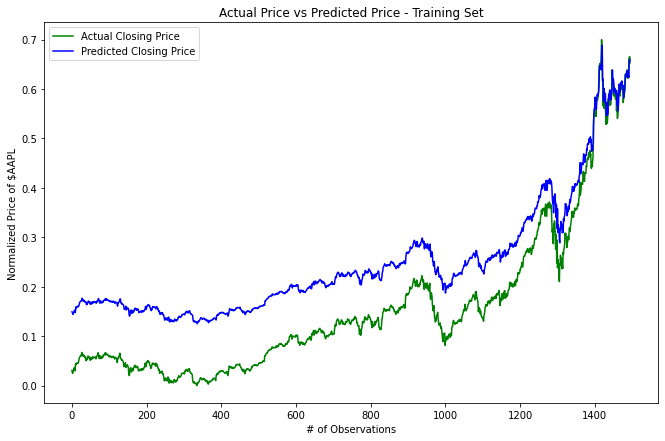

In [ ]:
graph.figure(figsize=(11, 7))
graph.title('Actual Price vs Predicted Price - Training Set')
graph.plot(train_set_y, color='green', label='Actual Closing Price')
graph.plot(train_set_y_pred, color='blue', label='Predicted Closing Price')
graph.xlabel('# of Observations')
graph.ylabel('Normalized Price of $AAPL')
graph.legend()
graph.show()

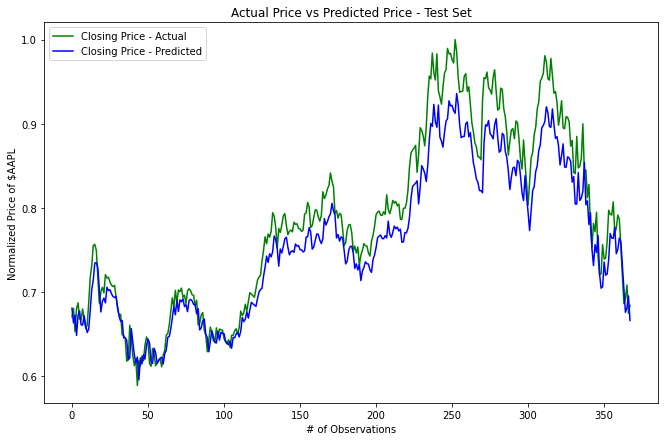

In [ ]:
graph.figure(figsize=(11, 7))
graph.title('Actual Price vs Predicted Price - Test Set')
graph.plot(test_set_y, color='green', label='Closing Price - Actual')
graph.plot(test_set_y_pred, color='blue', label='Closing Price - Predicted')
graph.xlabel('# of Observations')
graph.ylabel('Normalized Price of $AAPL')
graph.legend()
graph.show()

In [ ]:
# Performance Metrics

print('Train Set - RMSE : ',root_mean_square_error(train_set_y, train_set_y_pred))

print('Test Set - RMSE :  ',root_mean_square_error(test_set_y, test_set_y_pred))

print('Train Set - MAPE : ',mean_absolute_percentage_error(train_set_y, train_set_y_pred))

print('Test Set - MAPE :  ',mean_absolute_percentage_error(test_set_y, test_set_y_pred))

loss = lstm.loss_trainset()
print("Training Loss Percentage: ", float(loss[-1])*100)

Train Set - RMSE :  0.09605783408661932
Test Set - RMSE :   0.03578978240452979
Train Set - MAPE :  9.121280879404653
Test Set - MAPE :   2.910068173891889
Training Loss Percentage:  6.304469575710102
